<a href="https://colab.research.google.com/github/aprajeeta10/python-projects/blob/main/Estimating_Value_at_Risk_with_Python_Using_the_Parametric_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The parametric method estimates VaR by assuming that portfolio returns follow a normal distribution. We will use Python and the yfinance library to download historical stock data and perform the calculations.The parametric method estimates VaR by assuming that portfolio returns follow a normal distribution. We will use Python and the yfinance library to download historical stock data and perform the calculations.


**Set Timeframe and Define Tickers**

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf

years = 15

endDate = dt.datetime.now()
startDate = endDate - dt.timedelta(days=365*years)

tickers = ['SPY', 'BND', 'GLD', 'QQQ', 'VTI']

**Download Adjusted Close Prices and Calculate Log Returns**

In [2]:
adj_close_df = pd.DataFrame()
for ticker in tickers:
    data = yf.download(ticker, start=startDate, end=endDate)
    adj_close_df[ticker] = data['Adj Close']

log_returns = np.log(adj_close_df / adj_close_df.shift(1))
log_returns = log_returns.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


**Create Equally Weighted Portfolio and Calculate Historical Returns**

In [3]:
portfolio_value = 1000000
weights = np.array([1/len(tickers)] * len(tickers))

historical_returns = (log_returns * weights).sum(axis=1)

**Find X-Day Historical Returns**

In [4]:
days = 5
historical_x_day_returns = historical_returns.rolling(window=days).sum()

**Create Covariance Matrix and Calculate Portfolio Standard Deviation**

In [5]:
cov_matrix = log_returns.cov() * 252
portfolio_std_dev = np.sqrt(weights.T @ cov_matrix @ weights)

**Calculate VaR at Different Confidence Levels**

In [6]:
from scipy.stats import norm

confidence_levels = [0.90, 0.95, 0.99]

VaRs = []
for cl in confidence_levels:
    VaR = portfolio_value * (norm.ppf(1 - cl) * portfolio_std_dev * np.sqrt(days / 252) - historical_returns.mean() * days)
    VaRs.append(VaR)

**VaR Results**

In [7]:
print(f'{"Confidence Level":<20} {"Value at Risk":<20}')
print('-' * 40)

for cl, VaR in zip(confidence_levels, VaRs):
    print(f'{cl * 100:>6.0f}%: {"":<8} ${VaR:>10,.2f}')

Confidence Level     Value at Risk       
----------------------------------------
    90%:          $-23,063.50
    95%:          $-29,008.92
    99%:          $-40,161.54


**Plot the Distribution of Portfolio Returns and Parametric VaR Estimates**

In [9]:
import matplotlib.pyplot as plt

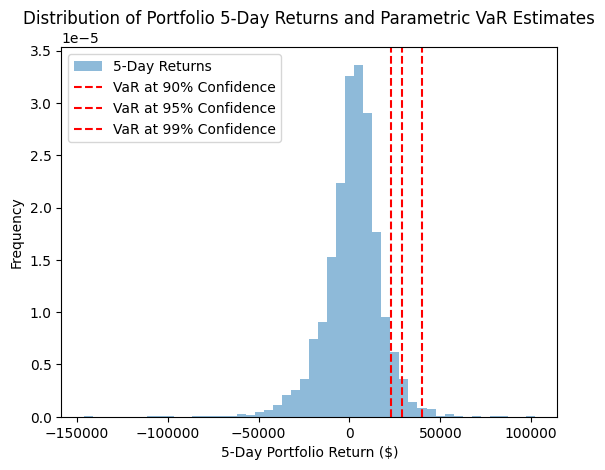

In [10]:
# Convert returns to dollar values for the histogram
historical_x_day_returns_dollar = historical_x_day_returns * portfolio_value

# Plot the histogram
plt.hist(historical_x_day_returns_dollar, bins=50, density=True, alpha=0.5, label=f'{days}-Day Returns')

# Add vertical lines representing VaR at each confidence level
for cl, VaR in zip(confidence_levels, VaRs):
    plt.axvline(x=-VaR, linestyle='--', color='r', label='VaR at {}% Confidence'.format(int(cl * 100)))

plt.xlabel(f'{days}-Day Portfolio Return ($)')
plt.ylabel('Frequency')
plt.title(f'Distribution of Portfolio {days}-Day Returns and Parametric VaR Estimates')
plt.legend()
plt.show()